# Risk Budgeting

**Adapted from Econ 424/CFRM 462 - Portfolio Risk Budgeting - Eric Zivot - August 14, 2014**

Risk Budgeting additively decompose a measure of portfolio risk into contributions from the individual assets in the portfolio.
by show which assets are most responsible for portfolio risk in terms of volatility

In [30]:
from primitive import *
import matplotlib.pyplot as plt

In [38]:
ris = rebase_at_x(pd.read_excel('risk_budgeting.xlsx', sheet_name='ris', index_col='ref_date'))
weights_and_names = pd.read_excel('risk_budgeting.xlsx', sheet_name='weights', index_col='instrument_id')
weights = weights_and_names.weight

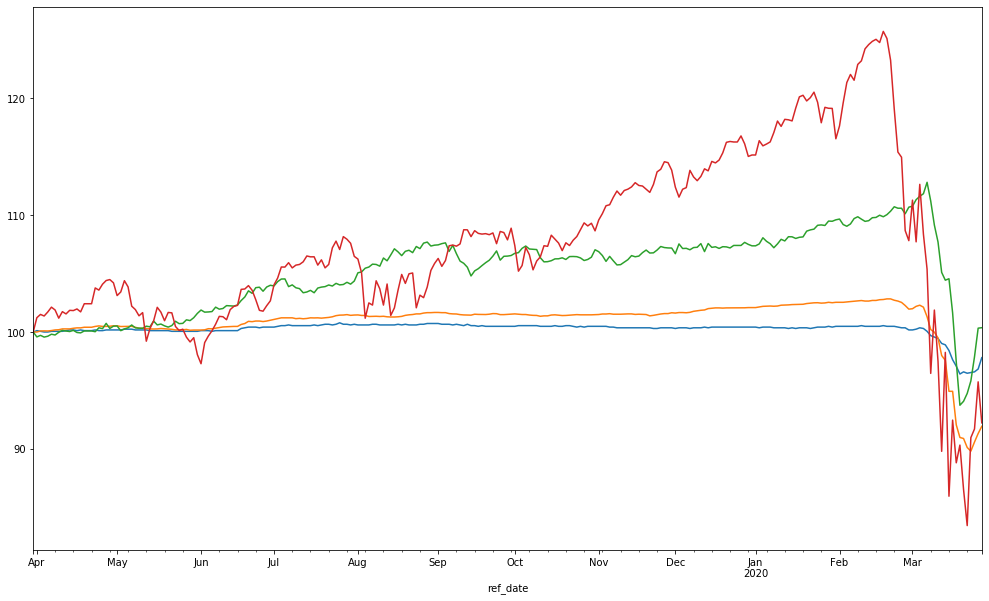

In [39]:
fig = plt.figure(figsize=(17, 10))
ax = fig.add_subplot(111)
ris.plot(ax=ax, linewidth=1.5, legend=False)
plt.show()

Return of a Portfolio in a certain time $t$ is simply defined as the weighted sum of each of its $n$ components return, i.e.

$$
\begin{equation}
\text{R}_p^{(t)} = \sum_{i}^{n} \text{w}_i^{(t)} \text{r}_i^{(t)}\tag{1}
\end{equation}
$$

In a two assets world:

$$
\text{R}_p^{(t)} = \text{w}_1^{(t)} \text{r}_1^{(t)} + \text{w}_2^{(t)} \text{r}_2^{(t)}
$$

Over time, portfolio return will be a vector of returns where each day's return is computed as in $(1)$:

$$
\text{R}_p = \text{w}_1 \text{r}_1 + \text{w}_2 \text{r}_2
$$


Its variance and standard deviation are respectivelyis (dropping the time notation):

$$
\sigma_p^2= \text{w}_1^{2} \sigma_1^{2} + \text{w}_2^{2} \sigma_2^{2} + 2\text{w}_1\text{w}_2\sigma_{12}
$$

$$
\sigma_p= \sqrt{\text{w}_1^{2} \sigma_1^{2} + \text{w}_2^{2} \sigma_2^{2} + 2\text{w}_1\text{w}_2\sigma_{12}}
$$



In [54]:
rets = ris.pct_change().dropna()
rets = rets.loc[:, weights.index.tolist()]
std_devs = rets.std()
ptf_ret = rets.dot(weights)  # compute ptf returns
ptf_vol = ptf_ret.std()

In [52]:
ptf_vol

0.003215483327540393

In [53]:
rets.corr()

,15442,28335,29037,165879
15442,1.000000,0.654492,0.564291,0.096095
28335,0.654492,1.000000,0.570925,0.455241
29037,0.564291,0.570925,1.000000,0.030261
165879,0.096095,0.455241,0.030261,1.000000
